## County Population Data of the United States of America

### Cleaning and Prepocessing

In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
df=pd.read_excel("C:\\Users\\sushe\\OneDrive\\Desktop\\data-presentation-Susheel1101\\County_Population_Center.xlsb", engine='pyxlsb')
display(df.head())

,X,Y,OBJECTID,YEAR,GEOID,STATEFP,COUNTYFP,STNAME,COUNAME,STPOSTAL,POPULATION,LATITUDE,LONGITUDE,NEAR_FID,NEAR_DIST,FEATURE_NAME,FEATURE_CLASS,COUNTY_NAME
0,-86.501832,32.500323,1,2000,1001,1,1,Alabama,Autauga,AL,43671,32.500323,-86.501832,78375,0.015803,Burt Cemetery,Cemetery,Autauga
1,-87.760540,30.565383,2,2000,1003,1,3,Alabama,Baldwin,AL,140415,30.565383,-87.760540,89915,0.010286,Silverhill Cemetery,Cemetery,Baldwin
2,-85.306746,31.847869,3,2000,1005,1,5,Alabama,Barbour,AL,29038,31.847869,-85.306746,116758,0.029414,Cotton Hill,Populated Place,Barbour
3,-87.127019,33.025947,4,2000,1007,1,7,Alabama,Bibb,AL,20826,33.025947,-87.127019,101183,0.007036,Lone Star School (historical),School,Bibb
4,-86.582617,33.962601,5,2000,1009,1,9,Alabama,Blount,AL,51024,33.962601,-86.582617,82423,0.005611,Greens Chapel,Locale,Blount


In [3]:
display(df.describe())

,X,Y,OBJECTID,YEAR,GEOID,STATEFP,COUNTYFP,POPULATION,LATITUDE,LONGITUDE,NEAR_FID,NEAR_DIST
count,9673.000000,9673.000000,9673.000000,9673.000000,9673.000000,9673.000000,9673.000000,9.673000e+03,9673.000000,9673.000000,9.673000e+03,9673.000000
mean,-91.556189,37.920147,4837.000000,2009.989662,31450.763155,31.347772,102.991006,9.643615e+04,37.920147,-91.556189,1.116745e+06,0.010495
std,14.542139,6.203225,2792.498911,8.167491,16331.674272,16.316840,106.909010,3.104459e+05,6.203225,14.542139,6.396134e+05,0.020846
min,-171.044030,-14.337387,1.000000,2000.000000,1001.000000,1.000000,1.000000,6.000000e+00,-14.337387,-171.044030,2.273000e+03,0.000027
25%,-98.061108,34.311974,2419.000000,2000.000000,19035.000000,19.000000,35.000000,1.127600e+04,34.311974,-98.061108,5.300500e+05,0.003819
50%,-89.963255,38.212966,4837.000000,2010.000000,30029.000000,30.000000,79.000000,2.570800e+04,38.212966,-89.963255,1.128683e+06,0.007523
75%,-82.964953,41.685888,7255.000000,2020.000000,46115.000000,46.000000,133.000000,6.479000e+04,41.685888,-82.964953,1.665404e+06,0.013289
max,146.811446,70.636549,9673.000000,2020.000000,78030.000000,78.000000,840.000000,1.001401e+07,70.636549,146.811446,2.212007e+06,1.373439


In [4]:
# Check for missing values
print(df.isnull().sum())


X                0
Y                0
OBJECTID         0
YEAR             0
GEOID            0
STATEFP          0
COUNTYFP         0
STNAME           1
COUNAME          0
STPOSTAL         3
POPULATION       0
LATITUDE         0
LONGITUDE        0
NEAR_FID         0
NEAR_DIST        0
FEATURE_NAME     0
FEATURE_CLASS    0
COUNTY_NAME      0
dtype: int64


In [5]:
# Remove rows with missing values
df_cleaned = df.dropna()

# Check the shape of the cleaned dataset
cleaned_shape = df_cleaned.shape
cleaned_shape

(9670, 18)

### Logarithmic Transformation

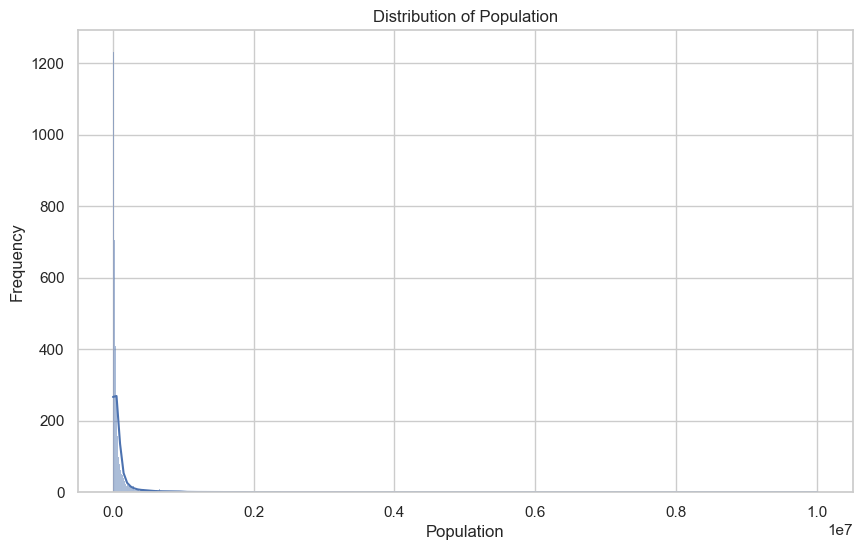

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Plotting the distribution of the 'POPULATION' column
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['POPULATION'], kde=True)
plt.title('Distribution of Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()



The distribution of the 'POPULATION' column is highly right-skewed, which is a common characteristic of population data. This skewness suggests that a logarithmic transformation could be beneficial, especially if you're planning to perform statistical analyses or linear modeling where normality of the data is important.

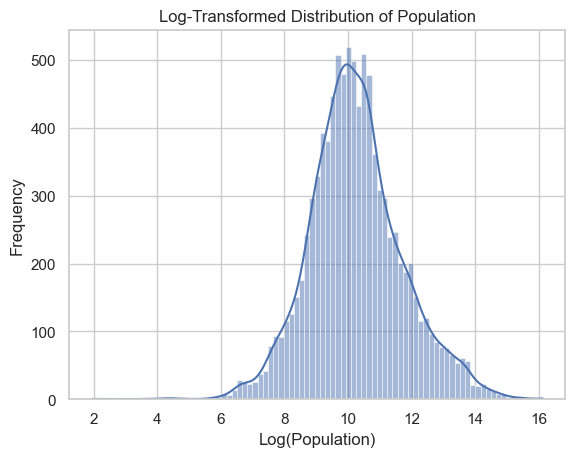

In [7]:
import numpy as np

df_cleaned = df.dropna().copy()
df_cleaned['POPULATION_LOG'] = np.log(df_cleaned['POPULATION'] + 1)

# Plotting the transformed data
sns.histplot(df_cleaned['POPULATION_LOG'], kde=True)
plt.title('Log-Transformed Distribution of Population')
plt.xlabel('Log(Population)')
plt.ylabel('Frequency')
plt.show()


The logarithmic transformation of the 'POPULATION' column has resulted in a distribution that appears more symmetric and less skewed

In [8]:
#Display 5 random rows from the dataset
df_cleaned.sample(5)

,X,Y,OBJECTID,YEAR,GEOID,STATEFP,COUNTYFP,STNAME,COUNAME,STPOSTAL,POPULATION,LATITUDE,LONGITUDE,NEAR_FID,NEAR_DIST,FEATURE_NAME,FEATURE_CLASS,COUNTY_NAME,POPULATION_LOG
267,-106.944690,38.647794,268,2000,8051,8,51,Colorado,Gunnison,CO,13956,38.647794,-106.944690,159563,0.017004,May Bohm Ditch,Canal,Gunnison,9.543736
1512,-91.539446,37.630032,1513,2000,29065,29,65,Missouri,Dent,MO,14927,37.630032,-91.539446,667493,0.004800,KSMO-AM (Salem),Tower,Dent,9.610994
8990,-98.532945,29.484685,8991,2020,48029,48,29,Texas,Bexar,TX,2009324,29.484685,-98.532945,2018038,0.002120,San Antonio Fire Department Station 19,Building,Bexar,14.513309
5955,-93.850011,31.338566,5956,2010,48403,48,403,Texas,Sabine,TX,10834,31.338566,-93.850011,2033707,0.000292,Hemphill City Cemetery,Cemetery,Sabine,9.290537
3157,-66.054336,17.987294,3158,2000,72015,72,15,Puerto Rico,Arroyo,PR,19117,17.987294,-66.054336,1776134,0.006588,Las Mercedes,Populated Place,Arroyo,9.858386


### Summary

Data Exploration: Examined the initial structure and content of the dataset.

Handling Missing Values: Identified and removed rows with missing values.

Checking and Retaining Column Names: Kept the original column names as they were suitable for the dataset.

Data Transformation: Applied a logarithmic transformation to the 'POPULATION' column to address the skewness in its distribution.

### Visualization

In [9]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
gdf = gpd.GeoDataFrame(df_cleaned, geometry=gpd.points_from_xy(df_cleaned.LONGITUDE, df_cleaned.LATITUDE))
gdf.crs = 'epsg:4326'

In [10]:
# Identify the latest year in the dataset
latest_year = df['YEAR'].max()


C:\Users\sushe\AppData\Local\Temp\ipykernel_18328\1247724171.py:15: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



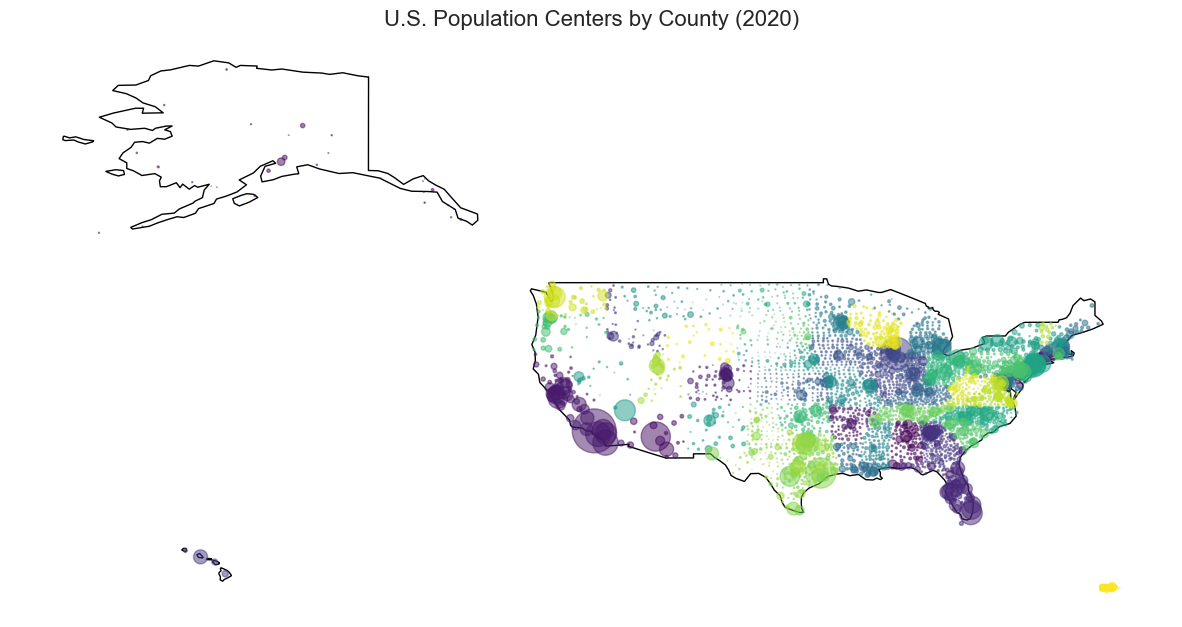

In [17]:
import geopandas as gpd
from shapely.geometry import Point

def create_us_population_map_geopandas(data, year, title):
    # Filter the data for the specified year
    year_data = data[data['YEAR'] == year]

    # Convert DataFrame to GeoDataFrame
    gdf = gpd.GeoDataFrame(year_data, geometry=gpd.points_from_xy(year_data.LONGITUDE, year_data.LATITUDE))

    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(15, 10))

    # Plot the base map of the USA
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    usa = world[world.name == 'United States of America']
    usa.plot(color='white', edgecolor='black', ax=ax)

    # Plot the data
    gdf.plot(ax=ax, marker='o', c=gdf['POPULATION'], cmap='viridis', markersize=gdf['POPULATION']/10000, alpha=0.5)

    # Set plot title and options
    ax.set_title(title, fontsize=16)
    ax.set_axis_off()  # Turn off the axis

    plt.show()

# Create and display the map for the year 2020 using GeoPandas
create_us_population_map_geopandas(df, 2020, 'U.S. Population Centers by County (2020)')




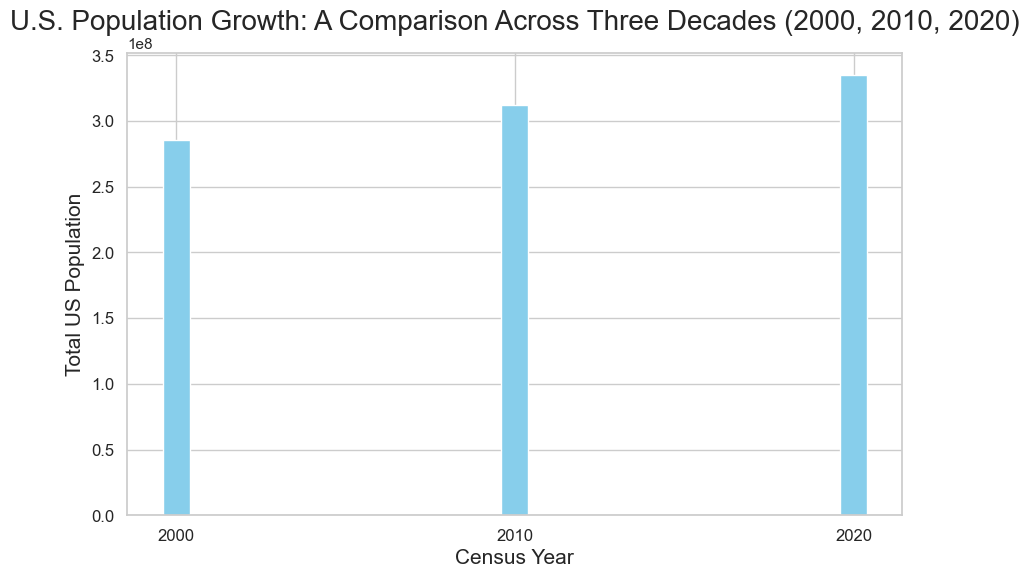

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Grouping the data by year and summing up the populations
total_population_by_year = df.groupby('YEAR')['POPULATION'].sum()

# Filtering out the years 2000, 2010, and 2020 for the comparison
selected_years = [2000, 2010, 2020]
total_population_selected_years = total_population_by_year[total_population_by_year.index.isin(selected_years)]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(total_population_selected_years.index, total_population_selected_years, color='skyblue')

# Customizing the layout and font sizes
plt.title("U.S. Population Growth: A Comparison Across Three Decades (2000, 2010, 2020)", fontsize=20)
plt.xlabel("Census Year", fontsize=15)
plt.ylabel("Total US Population", fontsize=15)
plt.xticks(selected_years, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()



# County

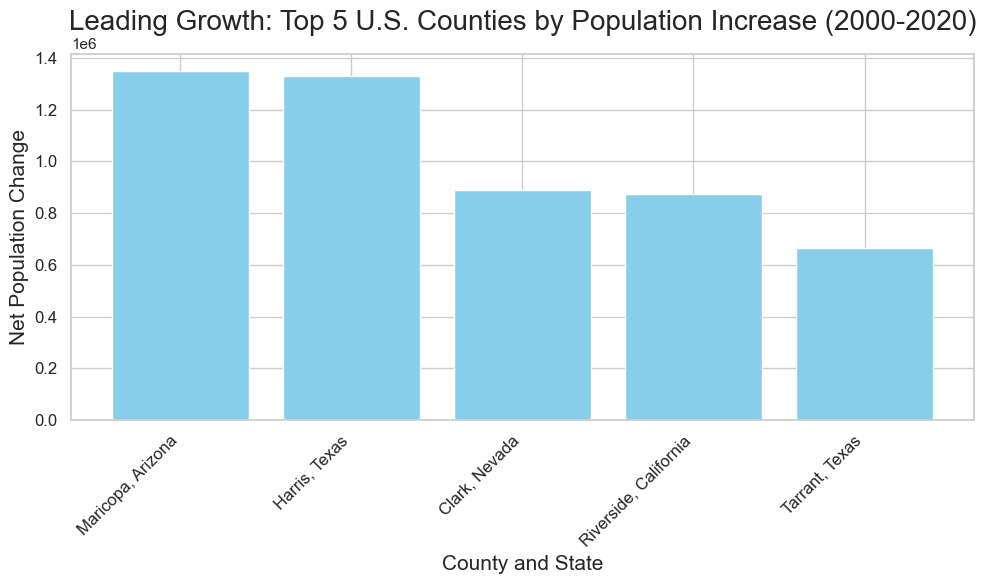

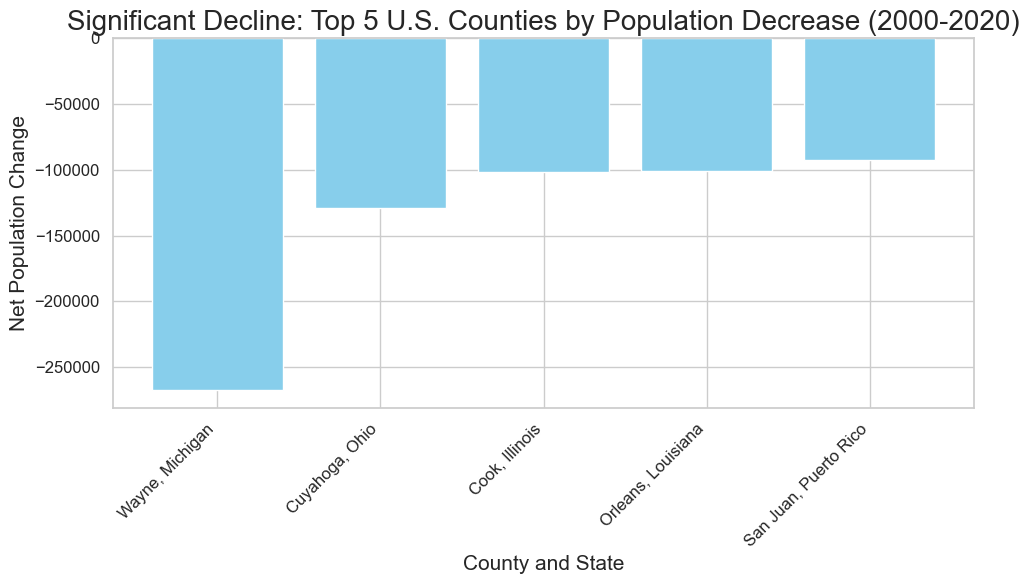

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is the DataFrame you've already loaded

# Create a combined column for County and State
df['County_State'] = df['COUNAME'] + ', ' + df['STNAME']

# Calculate the change in population for each county from 2000 to 2020
df_2000 = df[df['YEAR'] == 2000].groupby('County_State')['POPULATION'].sum()
df_2020 = df[df['YEAR'] == 2020].groupby('County_State')['POPULATION'].sum()
population_change = (df_2020 - df_2000).reset_index()
population_change.columns = ['County_State', 'Population Change']

# Top 5 growing and declining counties (with state names)
top_growing = population_change.nlargest(5, 'Population Change')
top_declining = population_change.nsmallest(5, 'Population Change')

# Function to create bar charts using Matplotlib
def create_bar_chart_matplotlib(data, title):
    plt.figure(figsize=(10, 6))
    plt.bar(data['County_State'], data['Population Change'], color='skyblue')
    plt.title(title, fontsize=20)
    plt.xlabel('County and State', fontsize=15)
    plt.ylabel('Net Population Change', fontsize=15)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

# Create and display bar charts for growing and declining counties
create_bar_chart_matplotlib(top_growing, 'Leading Growth: Top 5 U.S. Counties by Population Increase (2000-2020)')
create_bar_chart_matplotlib(top_declining, 'Significant Decline: Top 5 U.S. Counties by Population Decrease (2000-2020)')





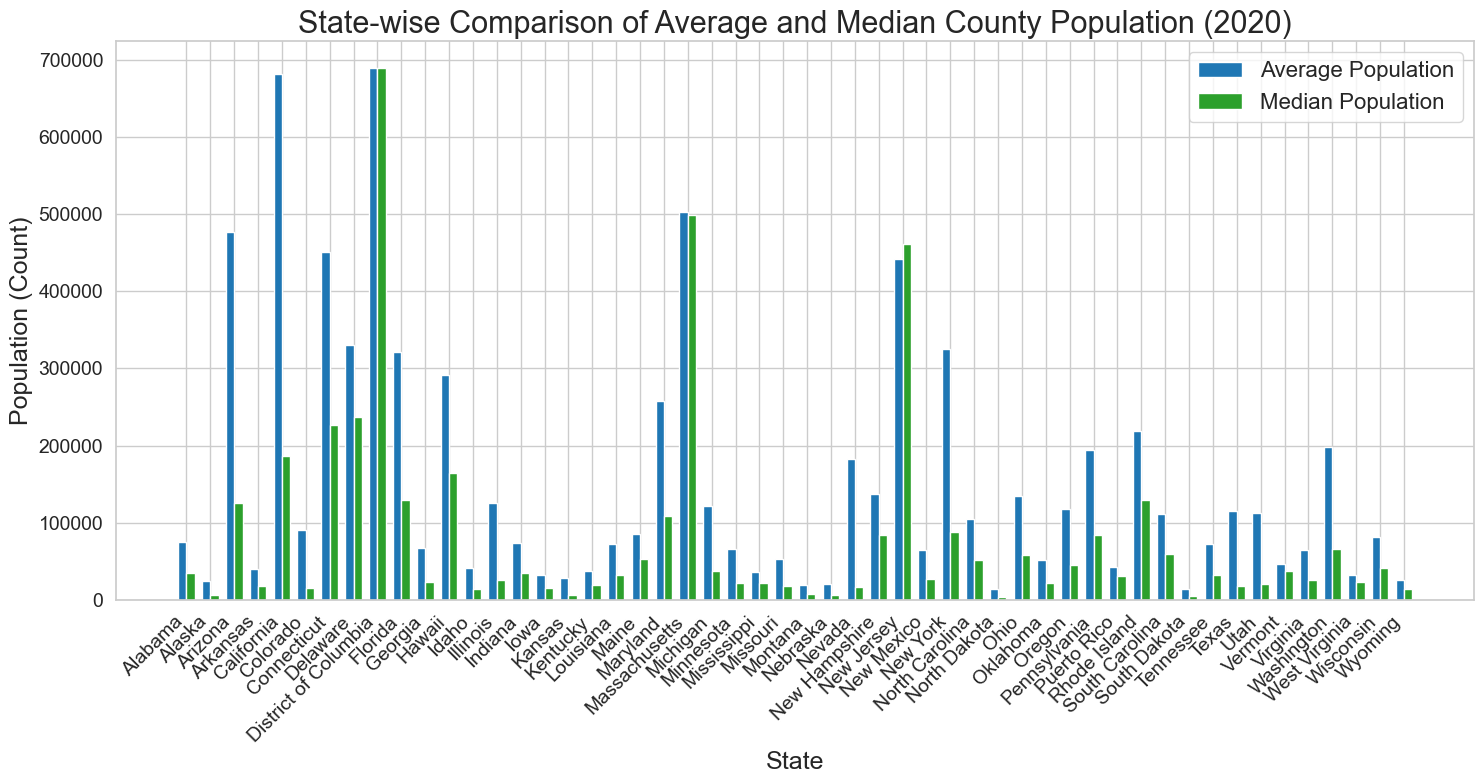

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame

# Aggregate data to calculate average and median county population per state for the year 2020
state_stats_2020 = df[df['YEAR'] == 2020].groupby('STNAME')['POPULATION'].agg(['mean', 'median']).reset_index()

# Setting up the x-axis for the grouped bar chart
x = np.arange(len(state_stats_2020['STNAME']))  # the label locations
width = 0.35  # the width of the bars

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x - width/2, state_stats_2020['mean'], width, label='Average Population', color='#1f77b4')
rects2 = ax.bar(x + width/2, state_stats_2020['median'], width, label='Median Population', color='#2ca02c')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('State', fontsize=18)
ax.set_ylabel('Population (Count)', fontsize=18)
ax.set_title('State-wise Comparison of Average and Median County Population (2020)', fontsize=22)
ax.set_xticks(x)
ax.set_xticklabels(state_stats_2020['STNAME'], rotation=45, ha='right')
ax.legend(fontsize=16)

# Customizing the layout
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

